# Wine Review | Data Exploration

In [41]:
import pandas as pd
import plotly_express as px

## Data Loading

In [9]:
wine_review = pd.read_csv("data/winemag-data-130k-v2.csv", index_col = 'Unnamed: 0')
wine_review.head()

country                                        description  \
0     Italy  Aromas include tropical fruit, broom, brimston...   
1  Portugal  This is ripe and fruity, a wine that is smooth...   
2        US  Tart and snappy, the flavors of lime flesh and...   
3        US  Pineapple rind, lemon pith and orange blossom ...   
4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

## Shape

In [10]:
wine_review.shape

(129971, 13)

In [11]:
wine_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


## Country

In [119]:
print(f"The dataset contains tastings of wines from {wine_review.country.nunique()} different countries.")

The dataset contains tastings of wines from 43 different countries.


In [40]:
country = wine_review.country.value_counts().reset_index()
country.rename(columns = {'index':'country', 'country':'count'}, inplace = True)
country['proportion'] = country['count'] / country['count'].sum()
country.sample(5)

country  count  proportion
20  Slovenia     87    0.000670
17   Romania    120    0.000924
42     Egypt      1    0.000008
5      Chile   4472    0.034424
16  Bulgaria    141    0.001085

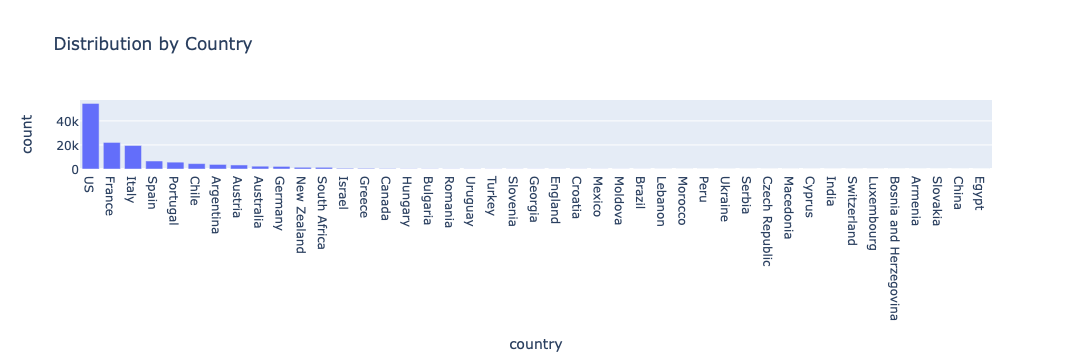

In [90]:
px.bar(data_frame=country, x='country', y='count', title='Distribution by Country')

## Points

In [45]:
wine_review.points.describe()

count    129971.000000
mean         88.447138
std           3.039730
min          80.000000
25%          86.000000
50%          88.000000
75%          91.000000
max         100.000000
Name: points, dtype: float64

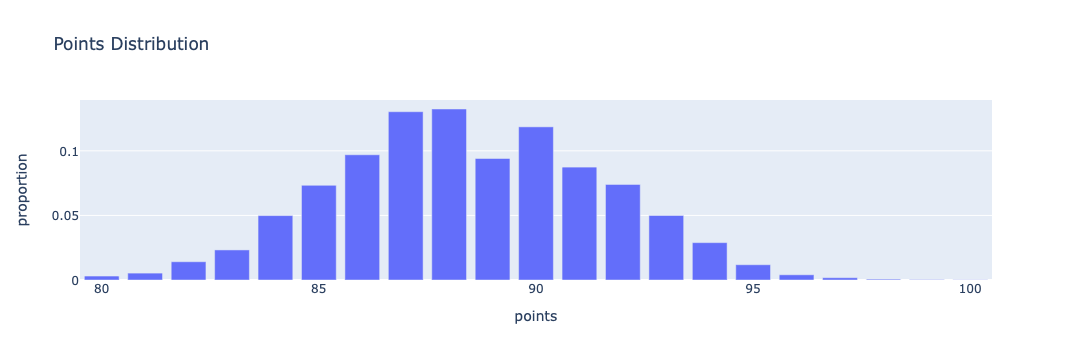

In [91]:
points = wine_review.points.value_counts(normalize=True).reset_index()
points.rename(columns={'index' : 'points', 'points' : 'proportion'}, inplace = True)

fig_points = px.bar(data_frame=points, x='points', y='proportion', title='Points Distribution')
fig_points.show()

## Price

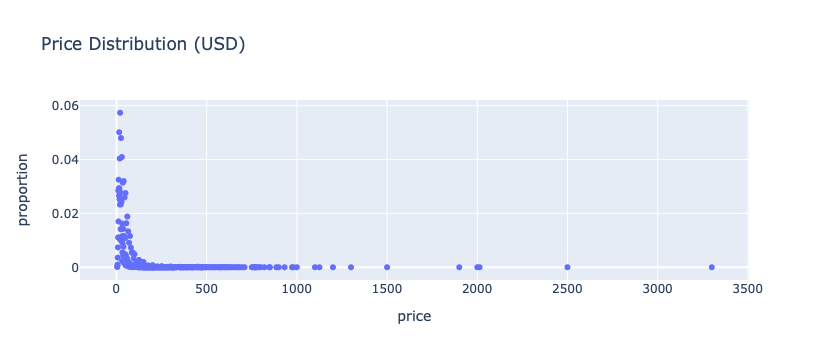

In [114]:
price = wine_review.price.value_counts(normalize=True).reset_index()
price.rename(columns={'index' : 'price', 'price' : 'proportion'}, inplace = True)

fig_price = px.scatter(data_frame=price, x='price', y='proportion', title='Price Distribution (USD)')
fig_price.show()

## Wine Testers

In [85]:
print(f"There are {wine_review.taster_name.nunique()} different wine taster.")

There are 19 different wine taster.


In [134]:
wine_review.taster_name.value_counts(dropna= False)

NaN                   26244
Roger Voss            25514
Michael Schachner     15134
Kerin O’Keefe         10776
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Anne Krebiehl MW       3685
Lauren Buzzeo          1835
Susan Kostrzewa        1085
Mike DeSimone           514
Jeff Jenssen            491
Alexander Peartree      415
Carrie Dykes            139
Fiona Adams              27
Christina Pickard         6
Name: taster_name, dtype: int64

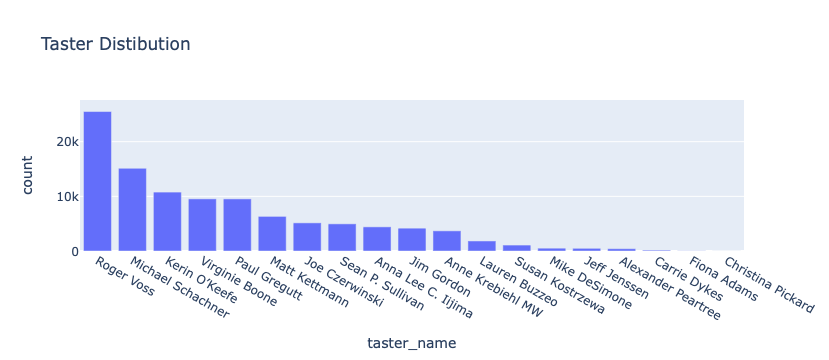

In [132]:
tasters = wine_review.taster_name.value_counts(dropna=False).reset_index()
tasters.rename(columns={'index':'taster_name', 'taster_name':'count'}, inplace=True)
px.bar(data_frame= tasters,
       x= 'taster_name',
       y= 'count',
       title= 'Taster Distibution')

In [115]:
taster_average_points = wine_review.groupby('taster_name').apply(lambda grp: grp.points.mean()).reset_index()
taster_average_points.rename(columns= {'taster_name':'taster_name',0:'average_points'}, inplace= True)
taster_average_points = taster_average_points.sort_values(by='average_points')
taster_average_points.head(5)

taster_name  average_points
0   Alexander Peartree       85.855422
3         Carrie Dykes       86.395683
17     Susan Kostrzewa       86.609217
5          Fiona Adams       86.888889
12   Michael Schachner       86.907493

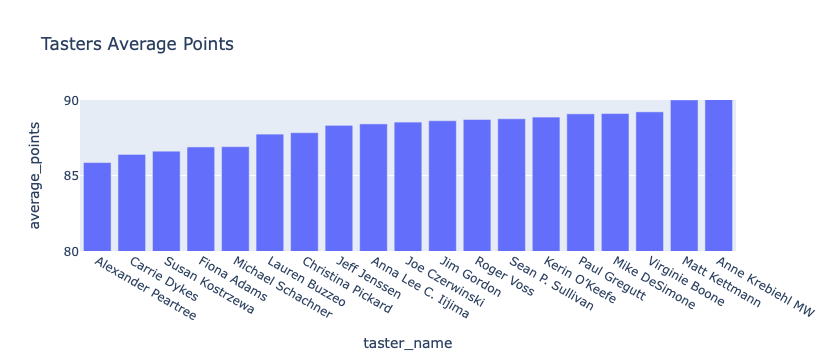

In [113]:
px.bar(data_frame= taster_average_points,
       x= 'taster_name',
       y= 'average_points',
       title= 'Tasters Average Points',
       range_y = [80,90])

## Winery

In [140]:
print(f'The dataset contains wines form {wine_review.winery.nunique()} different wineries.')

The dataset contains wines form 16757 different wineries.


In [143]:
wine_review.winery.value_counts()

Wines & Winemakers    222
Testarossa            218
DFJ Vinhos            215
Williams Selyem       211
Louis Latour          199
                     ... 
Hypothesis              1
Camps d'Estels          1
Harbor Town             1
Château de Saurs        1
Penedo Borges           1
Name: winery, Length: 16757, dtype: int64

In [150]:
winery = wine_review.groupby('winery').apply(lambda grp: grp[['points', 'price']].mean()).reset_index().sort_values(by= 'points')
winery

winery  points  price
7434      Fioravante    80.0   15.0
15242  Toca Diamonte    80.0    5.0
11624    Nine x Nine    80.0   13.0
13215         Reyter    80.0   13.0
8768       Immersion    80.0   10.0
...              ...     ...    ...
13619          Salon    96.8  380.6
7797         Gandona    97.0  190.0
8881      J.L. Chave    97.0  125.0
11893           Ovid    97.0  195.0
654           Araujo    98.0  275.0

[16757 rows x 3 columns]

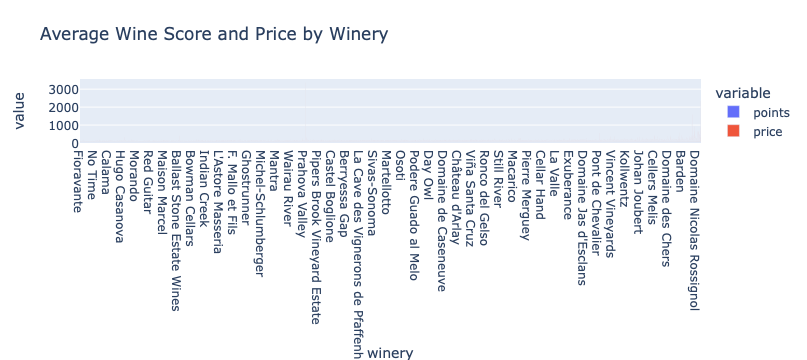

In [159]:
px.bar(data_frame= winery,
       x= 'winery',
       y= ['points', 'price'],
       title= 'Average Wine Score and Price by Winery')

## Duplications

In [126]:
wine_review[wine_review.duplicated()].shape[0]

9983

## Price & Score Correlation

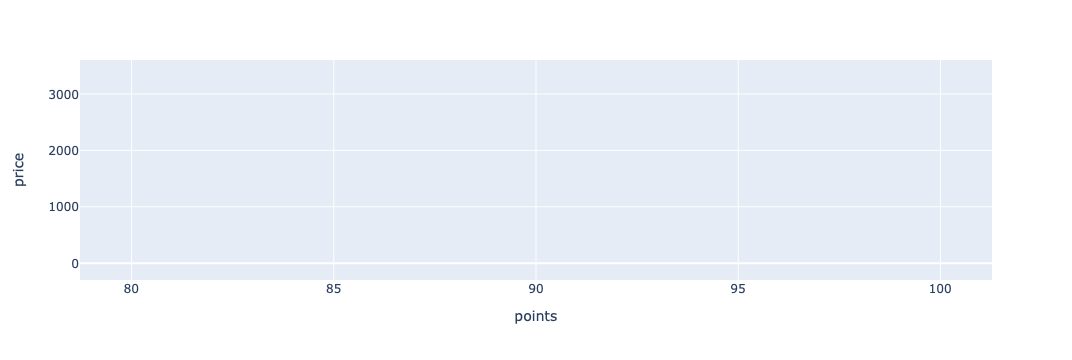

In [156]:
px.scatter(data_frame= wine_review,
        x= wine_review['points'],
        y= wine_review['price'])